In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

Reading Data

In [26]:
path = "/Users/sandy/Documents/IUB_Grad_School/Semesters/Fall_2023/AML/AML_Assignments/Assignment_1/happiness_data.csv"
happiness = pd.read_csv(path)

# **Question-A**

In [27]:
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [28]:
happiness.drop('year', axis=1, inplace=True)

In [29]:
happiness.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [30]:
# Get the size of the DataFrame
num_rows, num_columns = happiness.shape

# Print the size
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1949
Number of columns: 10


The available data has a total of 1949 rows and 10 columns, out of which one column (Year) is redundant for analysis and it will be dropped in the data cleaning section.

In the data, there are 9 continous values (float values) namely Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect and Negative affect.      
There is 1 categorical value (Country name) and the categorical values are explored below.

# **Question-B**

## **DATA CLEANING AND EXPLORATORY DATA ANALYSIS**

In [31]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1913 non-null   float64
 3   Social support                    1936 non-null   float64
 4   Healthy life expectancy at birth  1894 non-null   float64
 5   Freedom to make life choices      1917 non-null   float64
 6   Generosity                        1860 non-null   float64
 7   Perceptions of corruption         1839 non-null   float64
 8   Positive affect                   1927 non-null   float64
 9   Negative affect                   1933 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB


In [32]:
happiness.isnull().sum()

Country name                          0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [33]:
# Create a summary table of missing values
missing_data_summary = pd.DataFrame({
    'Feature': happiness.columns,
    'Missing Values': happiness.isnull().sum(),
    'Percentage Missing': (happiness.isnull().sum() / len(happiness)) * 100
})

# Sort the table by percentage missing values
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Display the summary table
print(missing_data_summary)

                                                           Feature  \
Perceptions of corruption                Perceptions of corruption   
Generosity                                              Generosity   
Healthy life expectancy at birth  Healthy life expectancy at birth   
Log GDP per capita                              Log GDP per capita   
Freedom to make life choices          Freedom to make life choices   
Positive affect                                    Positive affect   
Negative affect                                    Negative affect   
Social support                                      Social support   
Country name                                          Country name   
Life Ladder                                            Life Ladder   

                                  Missing Values  Percentage Missing  
Perceptions of corruption                    110            5.643920  
Generosity                                    89            4.566444  
Healthy life exp

Since, the percentage of missing values is almost 5% and we require all data points for further analysis. So we treat the null values by replacing them with the median of corresponding features.

In [34]:
happiness["Country name"].value_counts()

Country name
Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: count, Length: 166, dtype: int64

In [35]:
happiness.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


**Histograms**

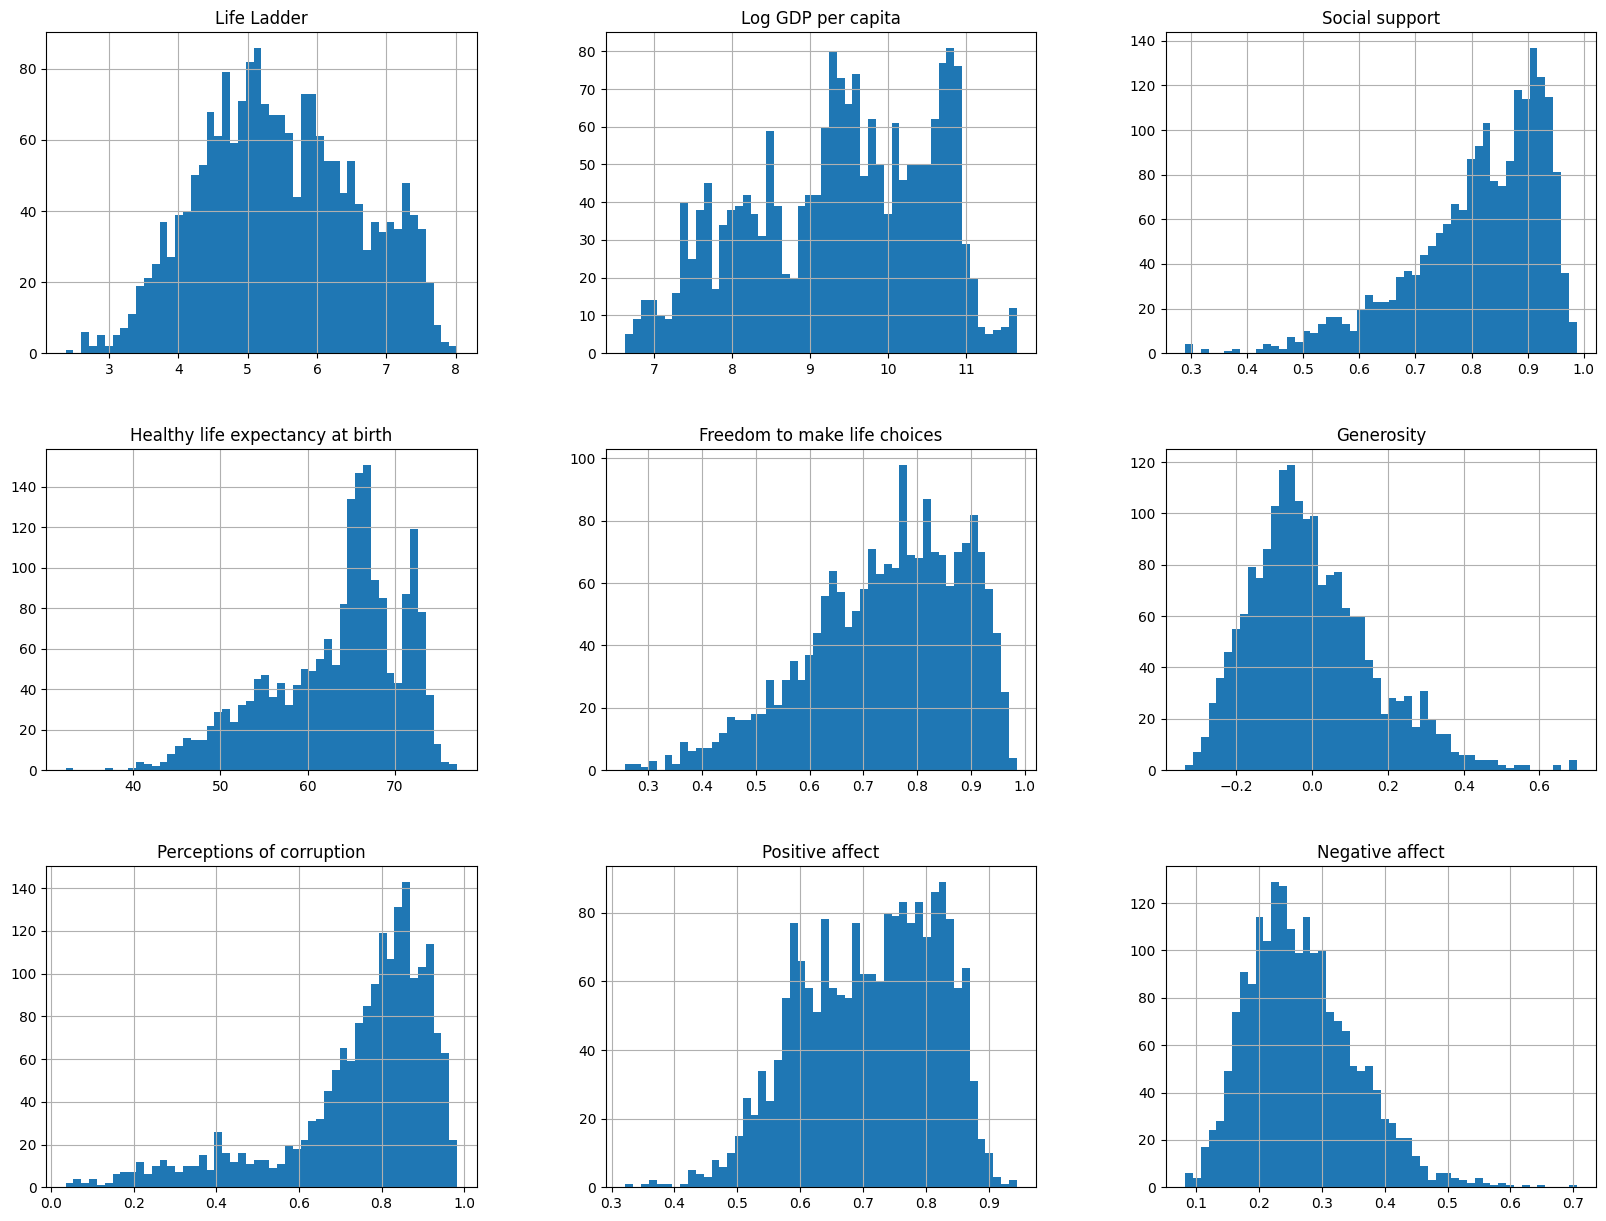

In [36]:
import matplotlib.pyplot as plt 
happiness.hist(bins=50, figsize=(20,15)) 
plt.show()

 # **Question-C**

In [37]:
numeric_columns = happiness.select_dtypes(include=['float'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

In [38]:
correlation_matrix["Life Ladder"].sort_values(ascending=False)

Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64

In [39]:
median = happiness["Log GDP per capita"].median()
happiness["Log GDP per capita"].fillna(median, inplace=True)

array([[<Axes: xlabel='Life Ladder', ylabel='Life Ladder'>,
        <Axes: xlabel='Log GDP per capita', ylabel='Life Ladder'>,
        <Axes: xlabel='Healthy life expectancy at birth', ylabel='Life Ladder'>,
        <Axes: xlabel='Social support', ylabel='Life Ladder'>,
        <Axes: xlabel='Positive affect', ylabel='Life Ladder'>,
        <Axes: xlabel='Freedom to make life choices', ylabel='Life Ladder'>,
        <Axes: xlabel='Perceptions of corruption', ylabel='Life Ladder'>],
       [<Axes: xlabel='Life Ladder', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Log GDP per capita', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Healthy life expectancy at birth', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Social support', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Positive affect', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Freedom to make life choices', ylabel='Log GDP per capita'>,
        <Axes: xlabel='Perceptions of corruption', ylabel='

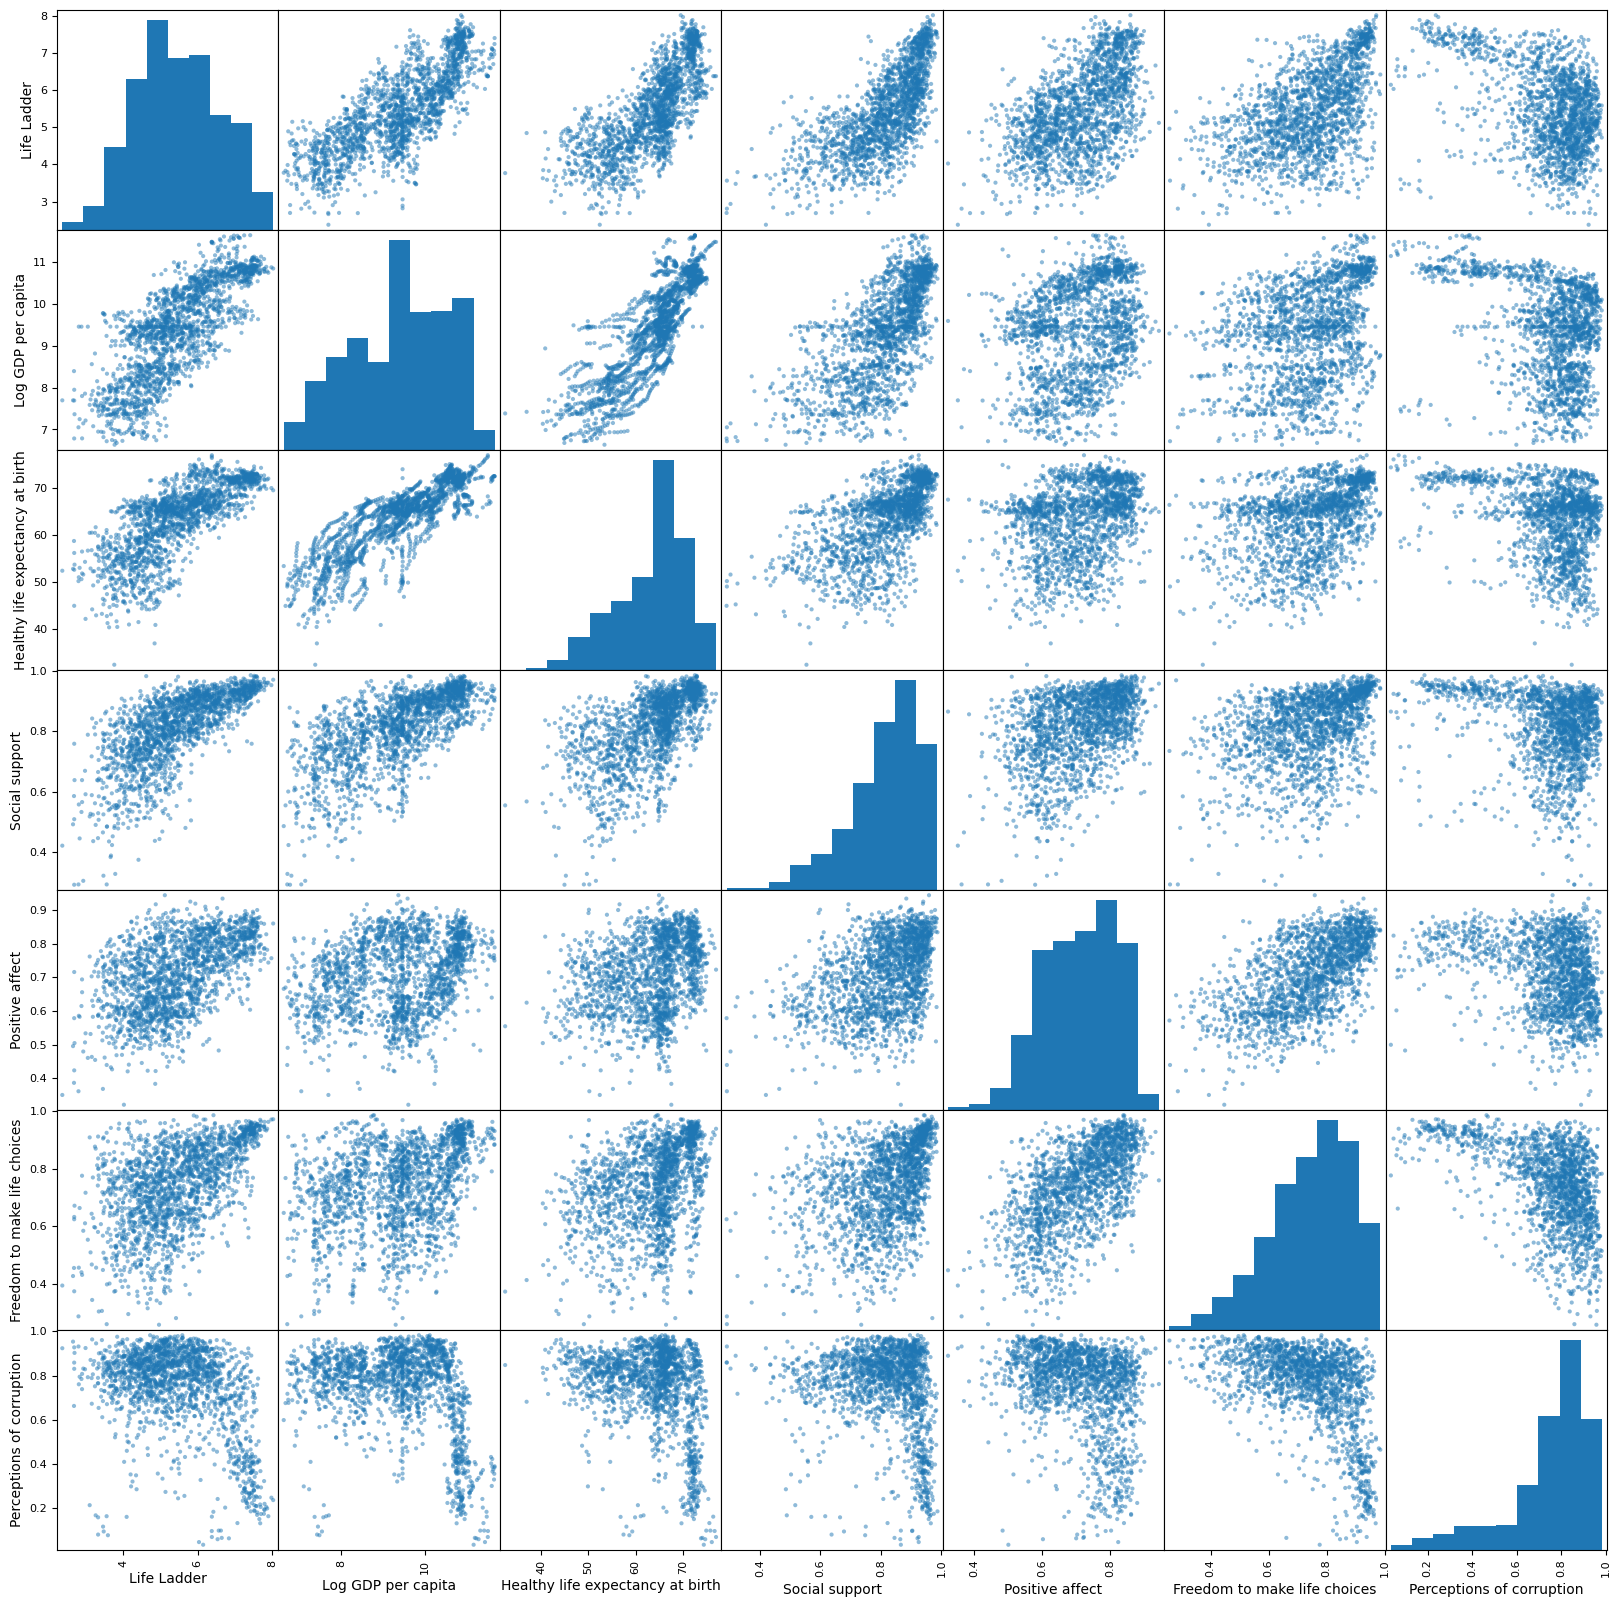

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth",
                  "Social support","Positive affect","Freedom to make life choices","Perceptions of corruption"]
scatter_matrix(happiness[attributes], figsize=(20, 20))

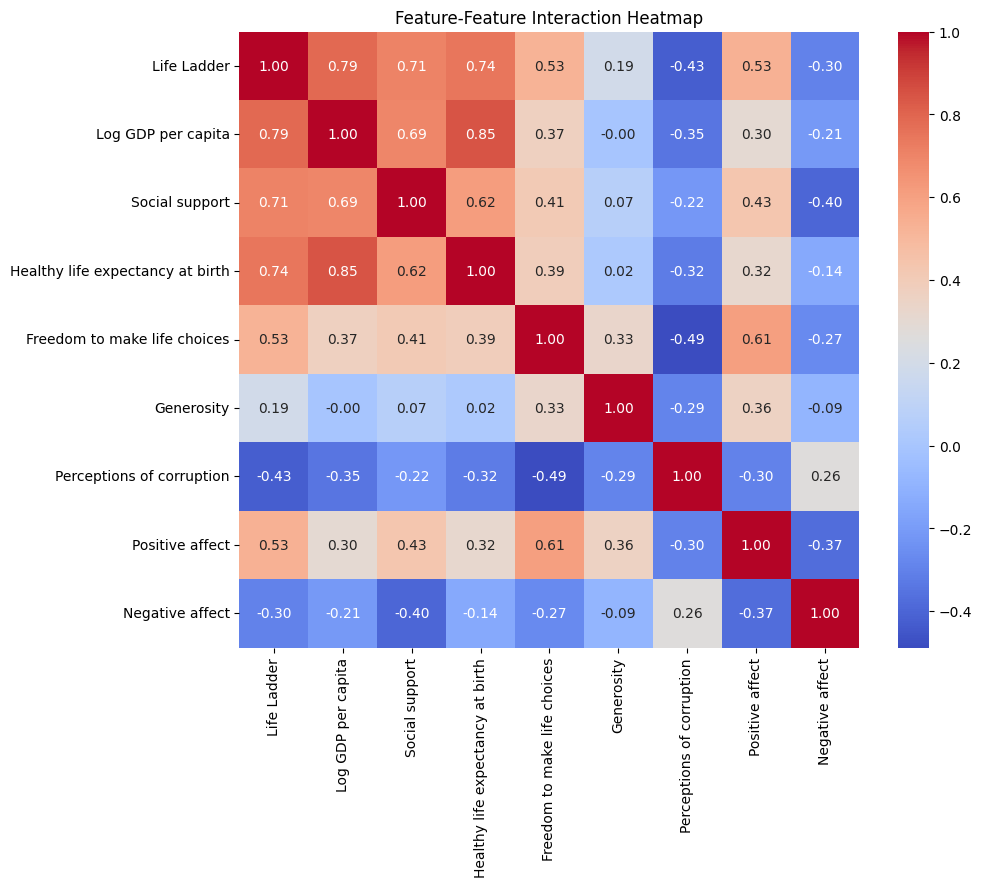

In [41]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Interaction Heatmap')
plt.show()


# **Question-D**

<Axes: >

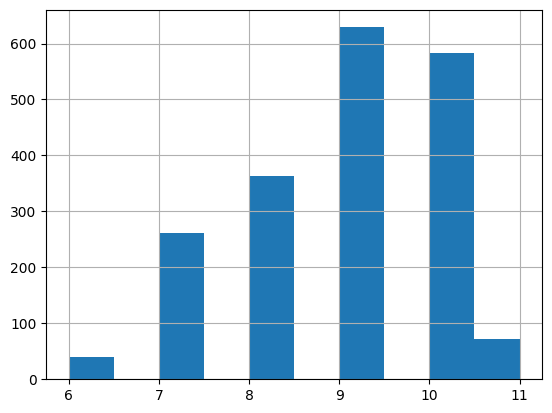

In [42]:
happiness["Log_GDP_per_capita_Category"] = pd.cut(happiness["Log GDP per capita"],
                                   bins=[6., 7., 8., 9.0, 10., 11., np.inf],labels=[6, 7, 8, 9, 10, 11])

happiness["Log_GDP_per_capita_Category"].hist()

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(happiness, happiness["Log_GDP_per_capita_Category"]):
        strat_train_set = happiness.loc[train_index]
        strat_test_set = happiness.loc[test_index]

In [44]:
strat_test_set["Log_GDP_per_capita_Category"].value_counts() / len(strat_test_set)

Log_GDP_per_capita_Category
9     0.323077
10    0.300000
8     0.187179
7     0.133333
11    0.035897
6     0.020513
Name: count, dtype: float64

In [45]:
# Combine the dataframes horizontally (side by side) for comparision
compare_df = pd.concat([happiness['Log GDP per capita'], strat_train_set['Log GDP per capita'], strat_test_set['Log GDP per capita']], axis=1)

# Print the combined dataframe
print(compare_df.describe())

       Log GDP per capita  Log GDP per capita  Log GDP per capita
count         1949.000000         1559.000000          390.000000
mean             9.370144            9.370891            9.367156
std              1.143437            1.142699            1.147846
min              6.635000            6.635000            6.776000
25%              8.478000            8.483500            8.470750
50%              9.460000            9.460000            9.456500
75%             10.335000           10.333500           10.365000
max             11.648000           11.645000           11.648000


In [46]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("Log_GDP_per_capita_Category", axis=1, inplace=True)

In [47]:
happiness_train = strat_train_set.copy()
happiness_test = strat_test_set.copy()

In [48]:
# Assuming  is your DataFrame
numeric_columns = happiness_train.select_dtypes(include=['float'])  # Select only numeric columns
correlation_matrix_train = numeric_columns.corr(method='pearson')

correlation_matrix_train["Life Ladder"].sort_values(ascending=False)

Life Ladder                         1.000000
Log GDP per capita                  0.787437
Healthy life expectancy at birth    0.745050
Social support                      0.712383
Positive affect                     0.540011
Freedom to make life choices        0.539210
Generosity                          0.204413
Negative affect                    -0.304242
Perceptions of corruption          -0.437402
Name: Life Ladder, dtype: float64

# **Question-E Part 1**

In [49]:
happiness_data_train = strat_train_set.copy()
happiness_data_test = strat_test_set.copy()

In [50]:
happiness_train_features = happiness_data_train.drop("Life Ladder", axis=1)
happiness_train_labels = happiness_data_train["Life Ladder"].copy()

In [51]:
happiness_test_features = happiness_data_test.drop("Life Ladder", axis=1)
happiness_test_labels = happiness_data_test["Life Ladder"].copy()

In [52]:
happiness_train_features_num = happiness_train_features.drop("Country name", axis=1)
happiness_train_features_cat = happiness_train_features[["Country name"]]

In [53]:
happiness_test_features_num = happiness_test_features.drop("Country name", axis=1)
happiness_test_features_cat = happiness_test_features[["Country name"]]

In [54]:
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler())
        ])

In [55]:
num_attribs = list(happiness_train_features_num)
cat_attribs = ["Country name"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

happiness_train_prepared = full_pipeline.fit_transform(happiness_train_features)

In [56]:
# Assuming you have the transformed data in happiness_train_prepared
column_names = full_pipeline.named_transformers_['num'].get_feature_names_out(num_attribs)
column_names = list(column_names) + cat_attribs
print(column_names)

['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Country name']


In [57]:
# Transform the test data features using the full pipeline
happiness_test_prepared = full_pipeline.transform(happiness_test_features)

In [58]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(happiness_train_prepared, happiness_train_labels)

LinearRegression()

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression model
lin_reg = LinearRegression()

# Perform four-fold cross-validation with RMSE scoring
lin_scores = cross_val_score(lin_reg, happiness_train_prepared, happiness_train_labels, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_r2_scores = cross_val_score(lin_reg, happiness_train_prepared, happiness_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
lin_reg.fit(happiness_train_prepared, happiness_train_labels)

# Predict on the test data
y_pred_normal = lin_reg.predict(happiness_test_prepared)

# Calculate RMSE on the test data
rmse_test_normal = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_normal))

# Calculate R2 Score on the test data
r2_test_normal = r2_score(happiness_test_labels, y_pred_normal)

print("RMSE (Test Data):", rmse_test_normal)
print("R2 Score (Test Data):", r2_test_normal)

RMSE (Test Data): 0.3598309260843314
R2 Score (Test Data): 0.8907491550382782


In [60]:
def display_scores(scores):
  print("Cross Validation Scores:\n")
  print("RMSE Scores:", scores)
  print("Mean RMSE :", scores.mean())
  print("Standard deviation:", scores.std())
  print("\n")

display_scores(lin_rmse_scores)

print("R2 Scores:", lin_r2_scores)
print("Mean R2 Scores:", np.mean(lin_r2_scores))


Cross Validation Scores:

RMSE Scores: [0.42468616 0.41438852 0.39188804 0.38434929]
Mean RMSE : 0.4038280032341679
Standard deviation: 0.01634449760978813


R2 Scores: [0.84865315 0.87133308 0.88433825 0.87393466]
Mean R2 Scores: 0.869564783828443


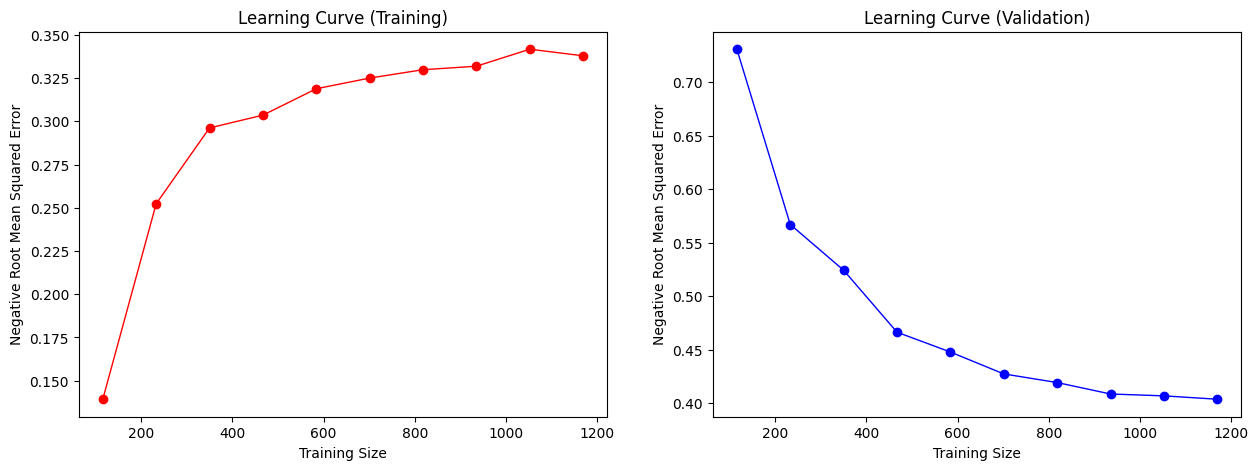

In [61]:
from sklearn.model_selection import learning_curve
    
# Assuming you have defined happiness_train_prepared and happiness_train_labels

# Create a Linear Regression model (you may have already done this)
lin_reg = LinearRegression()

train_sizes, train_scores, validation_scores = learning_curve(
    lin_reg,
    happiness_train_prepared,
    happiness_train_labels,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=4,
    scoring="neg_root_mean_squared_error"  # Use the appropriate scoring metric
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -validation_scores.mean(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot training errors
axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[0].set_xlabel("Training Size")
axes[0].set_ylabel("Negative Root Mean Squared Error")
axes[0].set_title("Learning Curve (Training)")

# Plot validation errors (corrected)
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
axes[1].set_xlabel("Training Size")
axes[1].set_ylabel("Negative Root Mean Squared Error")
axes[1].set_title("Learning Curve (Validation)")

plt.show()

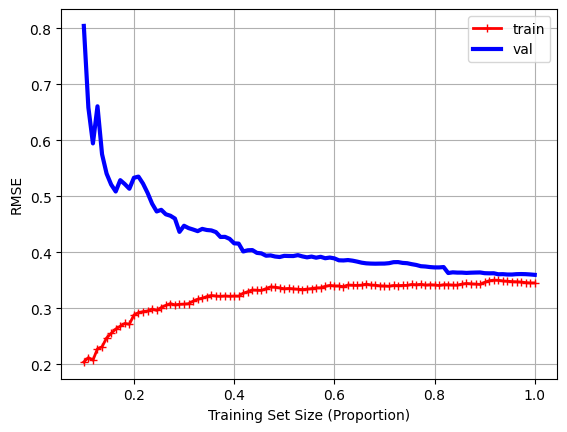

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, happiness_train_prepared, happiness_train_labels, happiness_test_prepared, happiness_test_labels, sample_sizes=None):
    if sample_sizes is None:
        sample_sizes = np.linspace(0.1, 1.0, 100)

    train_errors, val_errors = [], []
    for m in sample_sizes:
        # Calculate the number of samples to use
        num_samples = int(happiness_train_prepared.shape[0] * m)

        # Subset the training data
        train_subset = happiness_train_prepared[:num_samples]
        train_labels_subset = happiness_train_labels[:num_samples]

        model.fit(train_subset, train_labels_subset)
        y_train_predict = model.predict(train_subset)
        y_val_predict = model.predict(happiness_test_prepared)
       
        train_errors.append(mean_squared_error(train_labels_subset, y_train_predict))
        val_errors.append(mean_squared_error(happiness_test_labels, y_val_predict))

    plt.plot(sample_sizes, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(sample_sizes, np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

plot_learning_curves(lin_reg, happiness_train_prepared, happiness_train_labels, happiness_test_prepared, happiness_test_labels)
plt.show()


In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Specify the learning rate (eta0) as a hyperparameter
learning_rate = 0.05  # You can adjust this value
# 0.02->0.47,0.81, 0.03->0.42,0.84  0.04->0.41,0.85

# Create an SGDRegressor model with scaling (standardization)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=learning_rate)

# Perform four-fold cross-validation with RMSE scoring
sgd_scores = cross_val_score(sgd_model, happiness_train_prepared, happiness_train_labels, scoring="neg_mean_squared_error", cv=4)
sgd_rmse_scores = np.sqrt(-sgd_scores)
sgd_r2_scores = cross_val_score(sgd_model, happiness_train_prepared, happiness_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
sgd_model.fit(happiness_train_prepared, happiness_train_labels)

# Predict on the test data
y_pred_sgd = sgd_model.predict(happiness_test_prepared)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(happiness_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 0.40697157426391256
R2 Score (Test Data): 0.86024865906641


In [64]:
display_scores(sgd_rmse_scores)

print("R2 Scores:", sgd_r2_scores)
print("Mean R2 Scores:", np.mean(sgd_r2_scores))

Cross Validation Scores:

RMSE Scores: [0.60539224 0.51784159 0.43485391 0.46251271]
Mean RMSE : 0.5051501122227897
Standard deviation: 0.0651326743489404


R2 Scores: [0.69245346 0.79906974 0.85758605 0.8174462 ]
Mean R2 Scores: 0.7916388640722403


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration re

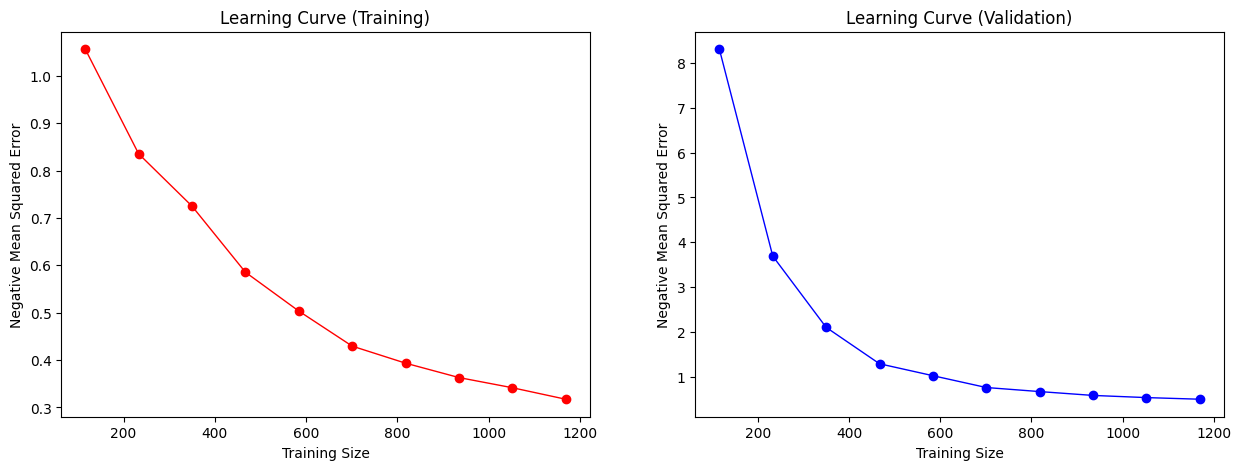

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Create an SGDRegressor model
sgd_reg = SGDRegressor()

train_sizes, train_scores, validation_scores = learning_curve(
    sgd_reg,
    happiness_train_prepared,
    happiness_train_labels,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=4,
    scoring="neg_mean_squared_error"  # Use neg_mean_squared_error
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -validation_scores.mean(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot training errors
axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[0].set_xlabel("Training Size")
axes[0].set_ylabel("Negative Mean Squared Error")
axes[0].set_title("Learning Curve (Training)")

# Plot validation errors (corrected)
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
axes[1].set_xlabel("Training Size")
axes[1].set_ylabel("Negative Mean Squared Error")
axes[1].set_title("Learning Curve (Validation)")

plt.show()


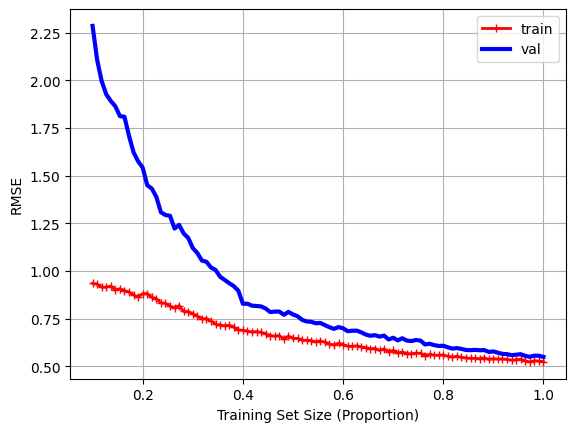

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor


# Create an SGDRegressor model
sgd_reg = SGDRegressor()

def plot_learning_curves(model, happiness_train_prepared, happiness_train_labels, happiness_test_prepared, happiness_test_labels, sample_sizes=None):
    if sample_sizes is None:
        sample_sizes = np.linspace(0.1, 1.0, 100)

    train_errors, val_errors = [], []
    for m in sample_sizes:
        # Calculate the number of samples to use
        num_samples = int(happiness_train_prepared.shape[0] * m)

        # Subset the training data
        train_subset = happiness_train_prepared[:num_samples]
        train_labels_subset = happiness_train_labels[:num_samples]

        model.fit(train_subset, train_labels_subset)
        y_train_predict = model.predict(train_subset)
        y_val_predict = model.predict(happiness_test_prepared)
       
        train_errors.append(mean_squared_error(train_labels_subset, y_train_predict))
        val_errors.append(mean_squared_error(happiness_test_labels, y_val_predict))

    plt.plot(sample_sizes, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(sample_sizes, np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

plot_learning_curves(sgd_reg, happiness_train_prepared, happiness_train_labels, happiness_test_prepared, happiness_test_labels)
plt.show()


# **Question-E Part 2**

In [67]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ridge, Lasso, and Elastic Net regularization
alpha_values = [0.01, 0.1, 1.0, 10.0]  # Sample alpha values to try

for alpha in alpha_values:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(happiness_train_prepared, happiness_train_labels)
    y_pred_ridge = ridge_model.predict(happiness_test_prepared)
    rmse_ridge = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_ridge))
    r2_ridge = r2_score(happiness_test_labels, y_pred_ridge)

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(happiness_train_prepared, happiness_train_labels)
    y_pred_lasso = lasso_model.predict(happiness_test_prepared)
    rmse_lasso = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_lasso))
    r2_lasso = r2_score(happiness_test_labels, y_pred_lasso)

    # Elastic Net
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Adjust l1_ratio as needed
    elastic_net_model.fit(happiness_train_prepared, happiness_train_labels)
    y_pred_elastic_net = elastic_net_model.predict(happiness_test_prepared)
    rmse_elastic_net = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_elastic_net))
    r2_elastic_net = r2_score(happiness_test_labels, y_pred_elastic_net)

    # Print results for each alpha value
    print(f"Alpha = {alpha}")
    print(f"Ridge RMSE: {rmse_ridge}, R-squared: {r2_ridge}")
    print(f"Lasso RMSE: {rmse_lasso}, R-squared: {r2_lasso}")
    print(f"Elastic Net RMSE: {rmse_elastic_net}, R-squared: {r2_elastic_net}")
    print("=" * 50)

Alpha = 0.01
Ridge RMSE: 0.35981216757370915, R-squared: 0.8907605455529254
Lasso RMSE: 0.5615318042495427, R-squared: 0.7339418606889188
Elastic Net RMSE: 0.556009171860394, R-squared: 0.7391494583484347
Alpha = 0.1
Ridge RMSE: 0.35766571066993025, R-squared: 0.8920599924003119
Lasso RMSE: 0.5757670199968928, R-squared: 0.7202813644750764
Elastic Net RMSE: 0.5670980939475506, R-squared: 0.7286410146831578
Alpha = 1.0
Ridge RMSE: 0.36145332445624895, R-squared: 0.8897617580854535
Lasso RMSE: 1.089323673945769, R-squared: -0.001248124749658075
Elastic Net RMSE: 0.8534185063854249, R-squared: 0.38545746996385477
Alpha = 10.0
Ridge RMSE: 0.43169280887167905, R-squared: 0.8427547772942738
Lasso RMSE: 1.089323673945769, R-squared: -0.001248124749658075
Elastic Net RMSE: 1.089323673945769, R-squared: -0.001248124749658075


Hyper parameter Tuning

In [68]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter grid for batch size and learning rate
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'eta0': [0.01, 0.05, 0.1, 0.5],  # Initial learning rate
    'max_iter': [1000],        # Maximum number of iterations
    'tol': [1e-3]              # Tolerance for stopping criterion
}

# Create the SGD Regressor
sgd_regressor = SGDRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(happiness_train_prepared, happiness_train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(happiness_test_prepared)
mse = mean_squared_error(happiness_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(happiness_test_labels, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Best Hyperparameters: {'alpha': 0.001, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
Mean Squared Error on Test Set: 0.1438281404091746
Root Mean Squared Error on Test Set: 0.37924680672244904
R2 Score 0.8786410817004329


In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.7053916208194648 {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
0.511116386598893 {'alpha': 0.0001, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
0.46836988249887773 {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
0.5026949433834617 {'alpha': 0.0001, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
0.7261075383504485 {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
0.5108284412787835 {'alpha': 0.001, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
0.4805296838737054 {'alpha': 0.001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
0.45612506639882405 {'alpha': 0.001, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
0.8253970080716952 {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
0.5116576962425647 {'alpha': 0.01, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
0.4781680785524656 {'alpha': 0.01, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
0.5195906311574334 {'alpha': 0.01, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
0.6945207752690993 {'

In [70]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define a range of batch sizes to test
batch_sizes = [100, 250, 500, 750, 1000]

for batch_size in batch_sizes:
    # Create an SGDRegressor with a fixed learning rate and regularization strength
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.001, alpha=0.001, max_iter=1000, tol=1e-3, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(1000):
        for i in range(0, happiness_train_prepared.shape[0], batch_size):  # Use shape[0] to get the number of rows
            X_batch = happiness_train_prepared[i:i + batch_size]
            y_batch = happiness_train_labels[i:i + batch_size]
            sgd_regressor.partial_fit(X_batch, y_batch)

    # Make predictions on the test set
    y_pred = sgd_regressor.predict(happiness_test_prepared)

    # Calculate and print the mean squared error and R2 score
    mse = mean_squared_error(happiness_test_labels, y_pred)
    rmse = np.sqrt(mse)
    r2_line_batch = r2_score(happiness_test_labels, y_pred)
    print(f"Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}, R2_Score: {r2_line_batch}")

Batch Size: 100, MSE: 0.137360455142082, RMSE: 0.37062171434237634, R2_Score: 0.8840983676368527
Batch Size: 250, MSE: 0.13715174987111123, RMSE: 0.3703400462697914, R2_Score: 0.8842744684044519
Batch Size: 500, MSE: 0.13717208975494077, RMSE: 0.37036750634328164, R2_Score: 0.8842573060724294
Batch Size: 750, MSE: 0.13683070373897802, RMSE: 0.3699063445508579, R2_Score: 0.8845453598392512
Batch Size: 1000, MSE: 0.13725902969521006, RMSE: 0.37048485757883554, R2_Score: 0.8841839481253816


# **Question-F Part 1**

Polynomial Regression

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Assuming you have gem_train_prepared, gem_test_prepared, gem_data_train_labels, and gem_data_test_labels already defined

# Choose the degree of the polynomial
degree = 2

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=degree)

happiness_train_polynomial = polynomial_features.fit_transform(happiness_train_prepared)
happiness_test_polynomial = polynomial_features.transform(happiness_test_prepared)

# Standardize the features with with_mean=False
scaler = StandardScaler(with_mean=False)
happiness_train_polynomial = scaler.fit_transform(happiness_train_polynomial)
happiness_test_polynomial = scaler.transform(happiness_test_polynomial)

# Initialize the models
normal_eq_model = LinearRegression()

# Perform k-fold cross-validation and calculate MSE for both models
normal_eq_mse = -cross_val_score(normal_eq_model, happiness_train_polynomial, happiness_train_labels, cv=4, scoring='neg_mean_squared_error')

# Train the normal equation model using the full training set
normal_eq_model.fit(happiness_train_polynomial, happiness_train_labels)

# Step 5: Evaluate the models
y_train_pred_normal_eq = normal_eq_model.predict(happiness_train_polynomial)
y_test_pred_normal_eq = normal_eq_model.predict(happiness_test_polynomial)

print("Normal Equation Model:")
print("Mean RMSE (Cross-Validation):", np.mean(normal_eq_mse))

# Calculate metrics for the normal equation model
train_rmse_normal_eq = np.sqrt(mean_squared_error(happiness_train_labels, y_train_pred_normal_eq))
test_rmse_normal_eq = np.sqrt(mean_squared_error(happiness_test_labels, y_test_pred_normal_eq))
r2_train_normal_eq = r2_score(happiness_train_labels, y_train_pred_normal_eq)
r2_test_normal_eq = r2_score(happiness_test_labels, y_test_pred_normal_eq)

print(f"Degree {degree} Polynomial Regression Model (Normal Equation):")
print(f"Train RMSE: {train_rmse_normal_eq}")
print(f"Test RMSE: {test_rmse_normal_eq}")
print(f"R-squared (Train): {r2_train_normal_eq}")
print(f"R-squared (Test): {r2_test_normal_eq}")

Normal Equation Model:
Mean RMSE (Cross-Validation): 38.58006061676245
Degree 2 Polynomial Regression Model (Normal Equation):
Train RMSE: 0.08897132915929343
Test RMSE: 1.7688341534350456
R-squared (Train): 0.9937107573258535
R-squared (Test): -1.6399886628799485


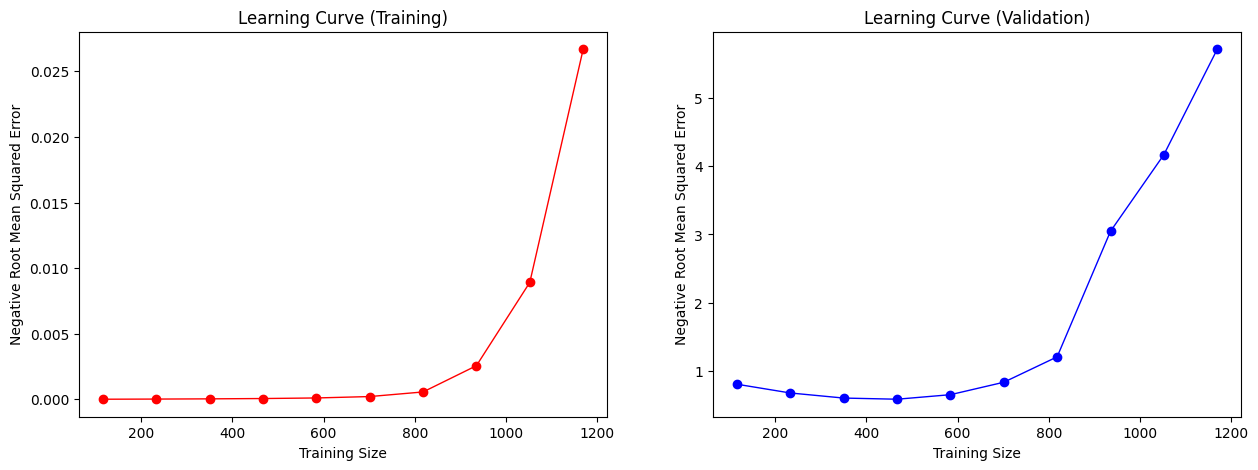

In [72]:
from sklearn.model_selection import learning_curve
    
# Assuming you have defined happiness_train_polynomial and happiness_train_labels

# Create a Linear Regression model (you may have already done this)
lin_reg = LinearRegression()

train_sizes, train_scores, validation_scores = learning_curve(
    lin_reg,
    happiness_train_polynomial,
    happiness_train_labels,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=4,
    scoring="neg_root_mean_squared_error"  # Use the appropriate scoring metric
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -validation_scores.mean(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot training errors
axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[0].set_xlabel("Training Size")
axes[0].set_ylabel("Negative Root Mean Squared Error")
axes[0].set_title("Learning Curve (Training)")

# Plot validation errors (corrected)
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
axes[1].set_xlabel("Training Size")
axes[1].set_ylabel("Negative Root Mean Squared Error")
axes[1].set_title("Learning Curve (Validation)")

plt.show()

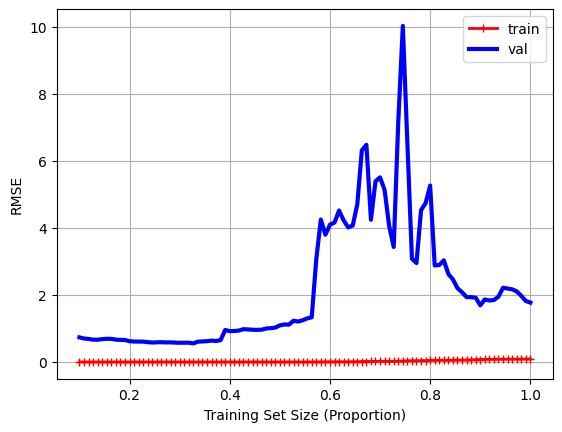

In [73]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, happiness_train_polynomial, happiness_train_labels, happiness_test_polynomial, happiness_test_labels, sample_sizes=None):
    if sample_sizes is None:
        sample_sizes = np.linspace(0.1, 1.0, 100)

    train_errors, val_errors = [], []
    for m in sample_sizes:
        # Calculate the number of samples to use
        num_samples = int(happiness_train_polynomial.shape[0] * m)

        # Subset the training data
        train_subset = happiness_train_polynomial[:num_samples]
        train_labels_subset = happiness_train_labels[:num_samples]

        model.fit(train_subset, train_labels_subset)
        y_train_predict = model.predict(train_subset)
        y_val_predict = model.predict(happiness_test_polynomial)
       
        train_errors.append(mean_squared_error(train_labels_subset, y_train_predict))
        val_errors.append(mean_squared_error(happiness_test_labels, y_val_predict))

    plt.plot(sample_sizes, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(sample_sizes, np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

plot_learning_curves(lin_reg, happiness_train_polynomial, happiness_train_labels, happiness_test_polynomial, happiness_test_labels)
plt.show()


In [74]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Specify the learning rate (eta0) as a hyperparameter
learning_rate = 0.0009  # You can adjust this value

# Create an SGDRegressor model with scaling (standardization)
sgd_model = SGDRegressor(max_iter=10000, tol=1e-3, random_state=42, eta0=learning_rate)

# Perform four-fold cross-validation with RMSE scoring
sgd_scores = cross_val_score(sgd_model, happiness_train_polynomial, happiness_train_labels, scoring="neg_mean_squared_error", cv=4)
sgd_rmse_scores = np.sqrt(-sgd_scores)
sgd_r2_scores = cross_val_score(sgd_model, happiness_train_polynomial, happiness_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
sgd_model.fit(happiness_train_polynomial, happiness_train_labels)

# Predict on the test data
y_pred_sgd = sgd_model.predict(happiness_test_polynomial)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(happiness_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 0.6342809373706998
R2 Score (Test Data): 0.6605380121070734


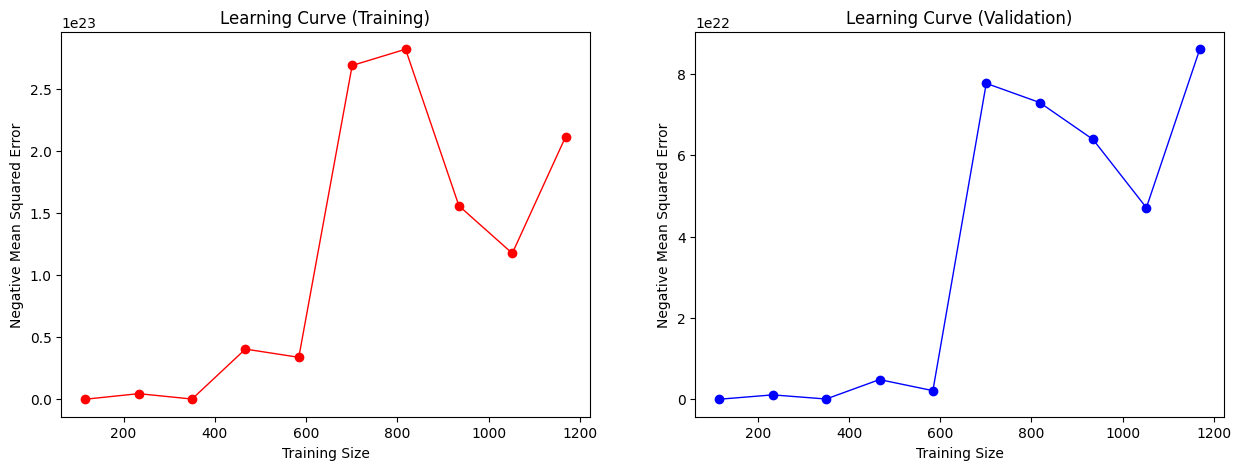

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Create an SGDRegressor model
sgd_reg = SGDRegressor()

train_sizes, train_scores, validation_scores = learning_curve(
    sgd_reg,
    happiness_train_polynomial,
    happiness_train_labels,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=4,
    scoring="neg_mean_squared_error"  # Use neg_mean_squared_error
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -validation_scores.mean(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot training errors
axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[0].set_xlabel("Training Size")
axes[0].set_ylabel("Negative Mean Squared Error")
axes[0].set_title("Learning Curve (Training)")

# Plot validation errors (corrected)
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
axes[1].set_xlabel("Training Size")
axes[1].set_ylabel("Negative Mean Squared Error")
axes[1].set_title("Learning Curve (Validation)")

plt.show()


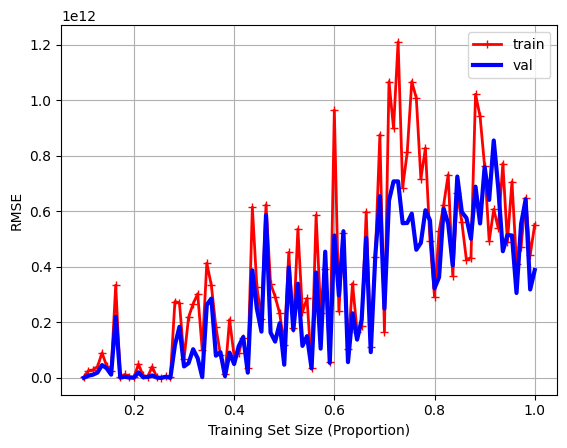

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor


# Create an SGDRegressor model
sgd_reg = SGDRegressor()

def plot_learning_curves(model, happiness_train_polynomial, happiness_train_labels, happiness_test_polynomial, happiness_test_labels, sample_sizes=None):
    if sample_sizes is None:
        sample_sizes = np.linspace(0.1, 1.0, 100)

    train_errors, val_errors = [], []
    for m in sample_sizes:
        # Calculate the number of samples to use
        num_samples = int(happiness_train_polynomial.shape[0] * m)

        # Subset the training data
        train_subset = happiness_train_polynomial[:num_samples]
        train_labels_subset = happiness_train_labels[:num_samples]

        model.fit(train_subset, train_labels_subset)
        y_train_predict = model.predict(train_subset)
        y_val_predict = model.predict(happiness_test_polynomial)
       
        train_errors.append(mean_squared_error(train_labels_subset, y_train_predict))
        val_errors.append(mean_squared_error(happiness_test_labels, y_val_predict))

    plt.plot(sample_sizes, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(sample_sizes, np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

plot_learning_curves(sgd_reg, happiness_train_polynomial, happiness_train_labels, happiness_test_polynomial, happiness_test_labels)
plt.show()


In [77]:
alphas = [0.001, 0.01, 0.1, 1, 10]
max_iter = 10000

for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha, max_iter=max_iter)
    ridge.fit(happiness_train_polynomial, happiness_train_labels)
    y_pred_ridge = ridge.predict(happiness_test_polynomial)
    mse_ridge = mean_squared_error(happiness_test_labels, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(happiness_test_labels, y_pred_ridge)

    # Lasso Regression
    lasso = Lasso(alpha=alpha, max_iter=max_iter)
    lasso.fit(happiness_train_polynomial, happiness_train_labels)
    y_pred_lasso = lasso.predict(happiness_test_polynomial)
    mse_lasso = mean_squared_error(happiness_test_labels, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(happiness_test_labels, y_pred_lasso)

    # Elastic Net
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=max_iter)
    elastic_net.fit(happiness_train_polynomial, happiness_train_labels)
    y_pred_elastic_net = elastic_net.predict(happiness_test_polynomial)
    mse_elastic_net = mean_squared_error(happiness_test_labels, y_pred_elastic_net)
    rmse_elastic_net = np.sqrt(mse_elastic_net)
    r2_elastic_net = r2_score(happiness_test_labels, y_pred_elastic_net)

    print(f"Alpha = {alpha}")
    print(f"Ridge MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2 Score: {r2_ridge}")
    print(f"Lasso MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2 Score: {r2_lasso}")
    print(f"Elastic Net MSE: {mse_elastic_net}, RMSE: {rmse_elastic_net}, R2 Score: {r2_elastic_net}")
    print()

Alpha = 0.001
Ridge MSE: 2.4127318090493026, RMSE: 1.5532970768817222, R2 Score: -1.035808303299898
Lasso MSE: 0.21439584319713859, RMSE: 0.463028987426423, R2 Score: 0.8190976567985395
Elastic Net MSE: 0.25245681290296446, RMSE: 0.5024508064507056, R2 Score: 0.7869826749890619

Alpha = 0.01
Ridge MSE: 1.642531633735623, RMSE: 1.281612903233899, R2 Score: -0.3859308879047476
Lasso MSE: 0.12867891341686788, RMSE: 0.3587184319447049, R2 Score: 0.8914236553722514
Elastic Net MSE: 0.12820610610740737, RMSE: 0.358058802583329, R2 Score: 0.8918225994417293

Alpha = 0.1
Ridge MSE: 0.7608834717816217, RMSE: 0.8722863473548246, R2 Score: 0.3579838074472761
Lasso MSE: 0.31049510648731893, RMSE: 0.557220877648459, R2 Score: 0.7380112810093296
Elastic Net MSE: 0.2500177573239565, RMSE: 0.5000177570086451, R2 Score: 0.7890406946915961

Alpha = 1
Ridge MSE: 0.429196386920445, RMSE: 0.6551308166469083, R2 Score: 0.6378538364845245
Lasso MSE: 1.1866260666187083, RMSE: 1.089323673945769, R2 Score: -0.0

In [78]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter grid for batch size and learning rate
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'eta0': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5],  # Initial learning rate
    'max_iter': [10000],        # Maximum number of iterations
    'tol': [1e-3]              # Tolerance for stopping criterion
}

# Create the SGD Regressor
sgd_regressor = SGDRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(happiness_train_polynomial, happiness_train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(happiness_test_polynomial)
mse = mean_squared_error(happiness_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(happiness_test_labels, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10000, 'tol': 0.001}
Mean Squared Error on Test Set: 0.39209834324464365
Root Mean Squared Error on Test Set: 0.626177565267747
R2 Score 0.6691563231795286


In [79]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define a range of batch sizes to test
batch_sizes = [100, 250, 500, 750, 1000]

for batch_size in batch_sizes:
    # Create an SGDRegressor with a fixed learning rate and regularization strength
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.0001, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(1000):
        for i in range(0, happiness_train_polynomial.shape[0], batch_size):
            X_batch = happiness_train_polynomial[i:i + batch_size]
            y_batch = happiness_train_labels[i:i + batch_size]
            sgd_regressor.partial_fit(X_batch, y_batch)

    # Make predictions on the test set
    y_pred = sgd_regressor.predict(happiness_test_polynomial)

    # Calculate and print the mean squared error
    mse = mean_squared_error(happiness_test_labels, y_pred)
    rmse = np.sqrt(mse)
    r2_line_batch = r2_score(happiness_test_labels, y_pred)
    print(f"Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}, R2_Score: {r2_line_batch}")

Batch Size: 100, MSE: 0.3709754410207115, RMSE: 0.6090775328484146, R2_Score: 0.6869793483396343
Batch Size: 250, MSE: 0.372451143780681, RMSE: 0.6102877548998349, R2_Score: 0.6857341838664505
Batch Size: 500, MSE: 0.37031431742027987, RMSE: 0.6085345655098647, R2_Score: 0.6875371894184554
Batch Size: 750, MSE: 0.3749024962135711, RMSE: 0.6122928190119259, R2_Score: 0.6836657883578927
Batch Size: 1000, MSE: 0.3667418764137069, RMSE: 0.6055921700399592, R2_Score: 0.6905515340036896


# **Question-G Part 1**

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(happiness_train_prepared, happiness_train_labels)
y_pred_normal = lin_reg.predict(happiness_test_prepared)
print(" Linear Regression")
rmse_test_normal = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_normal))
r2_test_normal = r2_score(happiness_test_labels, y_pred_normal)
print("RMSE (Test Data):", rmse_test_normal)
print("R2 Score (Test Data):", r2_test_normal)

 Linear Regression
RMSE (Test Data): 0.3598309260843314
R2 Score (Test Data): 0.8907491550382782


In [82]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=0.05)
sgd_model.fit(happiness_train_prepared, happiness_train_labels)
y_pred_sgd = sgd_model.predict(happiness_test_prepared)
rmse_test_sgd = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_sgd))
print("Linear Regression with SGD")
r2_test_sgd = r2_score(happiness_test_labels, y_pred_sgd)
print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

Linear Regression with SGD
RMSE (Test Data): 0.40697157426391256
R2 Score (Test Data): 0.86024865906641


In [83]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(happiness_train_prepared, happiness_train_labels)
y_pred_ridge = ridge_model.predict(happiness_test_prepared)
rmse_ridge = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_ridge))
r2_ridge = r2_score(happiness_test_labels, y_pred_ridge)

print("Linear Regression with Ridge regression: ")
print("RMSE:",rmse_ridge)
print("R2 Score:",r2_ridge)

Linear Regression with Ridge regression: 
RMSE: 0.35981216757370915
R2 Score: 0.8907605455529254


In [84]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(happiness_train_prepared, happiness_train_labels)
y_pred_lasso = lasso_model.predict(happiness_test_prepared)
rmse_lasso = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_lasso))
r2_lasso = r2_score(happiness_test_labels, y_pred_lasso)

print("Linear Regression with Lasso regression: ")
print("RMSE:",rmse_lasso)
print("R2 Score:",r2_lasso)

Linear Regression with Lasso regression: 
RMSE: 0.5615318042495427
R2 Score: 0.7339418606889188


In [86]:
polynomial_features = PolynomialFeatures(degree=2)
life_train_polynomial = polynomial_features.fit_transform(happiness_train_prepared)
life_test_polynomial = polynomial_features.transform(happiness_test_prepared)
scaler = StandardScaler(with_mean=False)
life_train_polynomial = scaler.fit_transform(happiness_train_polynomial)
life_test_polynomial = scaler.transform(happiness_test_polynomial)
normal_eq_model = LinearRegression()
test_rmse_normal_eq = np.sqrt(mean_squared_error(happiness_test_labels, y_test_pred_normal_eq))
r2_test_normal_eq = r2_score(happiness_test_labels, y_test_pred_normal_eq)
print(f"Degree 2 Polynomial Regression Model")
print(f"RMSE  Score: {test_rmse_normal_eq}")
print(f"R-squared: {r2_test_normal_eq}")

Degree 2 Polynomial Regression Model
RMSE  Score: 1.7688341534350456
R-squared: -1.6399886628799485


In [87]:
sgd_model = SGDRegressor(max_iter=10000, tol=1e-3, random_state=42, eta0=0.0009)
sgd_scores = cross_val_score(sgd_model, happiness_train_polynomial, happiness_train_labels, scoring="neg_mean_squared_error", cv=4)
sgd_rmse_scores = np.sqrt(-sgd_scores)
sgd_r2_scores = cross_val_score(sgd_model, happiness_train_polynomial, happiness_train_labels, scoring="r2", cv=4)
sgd_model.fit(happiness_train_polynomial, happiness_train_labels)
y_pred_sgd = sgd_model.predict(happiness_test_polynomial)
rmse_test_sgd = np.sqrt(mean_squared_error(happiness_test_labels, y_pred_sgd))
print("Polynomial Regression with SGD")
r2_test_sgd = r2_score(happiness_test_labels, y_pred_sgd)
print("RMSE:", rmse_test_sgd)
print("R2 Score:", r2_test_sgd)

Polynomial Regression with SGD
RMSE: 0.6342809373706998
R2 Score: 0.6605380121070734


In [88]:
ridge = Ridge(alpha=0.01, max_iter=max_iter)
ridge.fit(happiness_train_polynomial, happiness_train_labels)
y_pred_ridge = ridge.predict(happiness_test_polynomial)
mse_ridge = mean_squared_error(happiness_test_labels, y_pred_ridge)
print("Polynomial Regression with Ridge Regularization")
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(happiness_test_labels, y_pred_ridge)
print("RMSE:",rmse_ridge)
print("R2 Score:", r2_ridge)

Polynomial Regression with Ridge Regularization
RMSE: 1.281612903233899
R2 Score: -0.3859308879047476


In [89]:
lasso = Lasso(alpha=0.01, max_iter=max_iter)
lasso.fit(happiness_train_polynomial, happiness_train_labels)
y_pred_lasso = lasso.predict(happiness_test_polynomial)
mse_lasso = mean_squared_error(happiness_test_labels, y_pred_lasso)
print("Polynomial Regression with Lasso Regularization")
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(happiness_test_labels, y_pred_lasso)
print("RMSE:",rmse_lasso)
print("R2 Score:",r2_ridge)

Polynomial Regression with Lasso Regularization
RMSE: 0.3587184319447049
R2 Score: -0.3859308879047476


In [90]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=max_iter)
elastic_net.fit(happiness_train_polynomial, happiness_train_labels)
y_pred_elastic_net = elastic_net.predict(happiness_test_polynomial)
mse_elastic_net = mean_squared_error(happiness_test_labels, y_pred_elastic_net)
print("Polynomial Regression with Elastic Net Regularization")
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(happiness_test_labels, y_pred_elastic_net)
print("RMSE:",rmse_elastic_net)
print("R2 Score:",r2_elastic_net)

Polynomial Regression with Elastic Net Regularization
RMSE: 0.358058802583329
R2 Score: 0.8918225994417293


Proper Evaluation Metric is used for analyzing the models, which are MSE, RMSE and R2 Scores.

# **Question-G Part 2**

Of all the models, the polynomial regression with elastic net regularization has highest R2 score and least  RMSE score.



Future Work:

A much better control over hyperparameters and hyperparameter tuning can give much better results. Implementing advanced ML Algorithms can produce good results. In a few instances, the model performes overall good but in certain cross folds, it perfoms badly, which can be controlled by proper feature engineering and outlier treatment.

Further we have used polynomial degree 2 , we can increase this to see the better fitting model.

We have used 0.01 alpha value, we can tune this to see the alternate predictions for differrent learning rates.